#### Comment: This code work is combined effort of Group 4 from Section 2. 
#### ***Team members: Maanvee Mehrotra, Judy Qian, Jaskeerat Brar***
#### The interpretations are in our own words but maybe similar in meaning as the group worked towards similar insights.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
stock_df=pd.read_csv("fundamentals.csv")

In [3]:
stock_df.shape

(1781, 79)

In [4]:
stock_df.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


Cleaning the data by removing NAs and Unnecessary column

In [5]:
#removal of NA values in the dataset
stock_df = stock_df.dropna()

In [6]:
#removal of Unnecessary column in the dataset
stock_df = stock_df.drop(columns=['Unnamed: 0'])

## 1. Data Exploration and Visualization

In [7]:
stock_df.columns

Index(['Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Adjustments',
  

In [8]:
stock_df.describe()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,1.299000e+03,1.299000e+03,1.299000e+03,1299.000000,1.299000e+03,1.299000e+03,1299.000000,1.299000e+03,1.299000e+03,1.299000e+03,...,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1299.000000,1299.000000,1.299000e+03
mean,3.709840e+09,-7.364829e+07,8.845911e+07,47.234796,-1.471495e+09,4.248825e+09,73.934565,1.820352e+09,-8.116966e+07,1.344123e+09,...,8.085596e+09,5.637950e+09,9.537915e+09,1.712867e+10,2.666659e+10,2.134803e+10,-4.399277e+09,2013.219400,3.319923,5.807538e+08
std,7.463106e+09,5.304388e+08,7.583589e+08,249.888806,3.380823e+09,8.643626e+09,100.580915,3.072288e+09,4.218345e+08,6.212344e+09,...,1.447895e+10,1.001800e+10,1.824904e+10,2.844549e+10,4.361829e+10,4.489432e+10,1.605909e+10,22.193998,5.016596,9.966520e+08
min,7.199000e+07,-6.452000e+09,-4.577000e+09,0.000000,-3.798500e+10,-7.215000e+08,0.000000,2.100000e+04,-5.562000e+09,0.000000e+00,...,1.447860e+08,1.642480e+08,-1.324400e+10,2.320000e+08,1.103602e+09,5.804150e+08,-2.297340e+11,1215.000000,-61.200000,-1.513945e+09
25%,6.342590e+08,-1.010000e+08,-3.427000e+06,11.000000,-1.399000e+09,3.534500e+08,16.000000,2.970000e+08,-7.323100e+07,1.671000e+06,...,1.814450e+09,1.085870e+09,2.076000e+09,3.311690e+09,6.165850e+09,4.123165e+09,-3.186500e+09,2013.000000,1.590000,1.437613e+08
50%,1.388700e+09,-2.101900e+07,4.000000e+06,18.000000,-4.299870e+08,1.506000e+09,41.000000,8.270000e+08,-2.153000e+06,9.000000e+06,...,3.494000e+09,2.357200e+09,4.307075e+09,7.848200e+09,1.294400e+10,8.205088e+09,-3.381500e+08,2014.000000,2.790000,2.855204e+08
75%,3.261234e+09,1.710000e+07,3.780000e+07,28.000000,-1.563680e+08,5.044000e+09,89.000000,1.963500e+09,0.000000e+00,2.977500e+08,...,7.832350e+09,5.356500e+09,9.816950e+09,1.864400e+10,3.098300e+10,1.749658e+10,0.000000e+00,2015.000000,4.500000,5.570089e+08
max,6.067100e+10,4.692000e+09,1.416200e+10,5789.000000,0.000000e+00,9.110800e+10,1041.000000,5.352800e+10,2.658000e+09,6.846500e+10,...,1.396600e+11,8.233600e+10,1.743990e+11,2.800010e+11,4.026720e+11,4.856510e+11,0.000000e+00,2016.000000,50.090000,8.419048e+09


In [9]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 0 to 1779
Data columns (total 78 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Ticker Symbol                                        1299 non-null   object 
 1   Period Ending                                        1299 non-null   object 
 2   Accounts Payable                                     1299 non-null   float64
 3   Accounts Receivable                                  1299 non-null   float64
 4   Add'l income/expense items                           1299 non-null   float64
 5   After Tax ROE                                        1299 non-null   float64
 6   Capital Expenditures                                 1299 non-null   float64
 7   Capital Surplus                                      1299 non-null   float64
 8   Cash Ratio                                           1299 non-null  

In [10]:
#conversion of For Year into integer solely for cleaned dataset
stock_df['For Year'] = stock_df['For Year'].fillna(0).astype(int)

In [11]:
#conversion of Period Ending into datetime solely for cleaned dataset
stock_df['Period Ending'] = pd.to_datetime(stock_df['Period Ending'],format='%Y-%m-%d')

## Plots

Started with Histogram for Estimated Shares Outstanding as it the most important variable and will become our Y variable

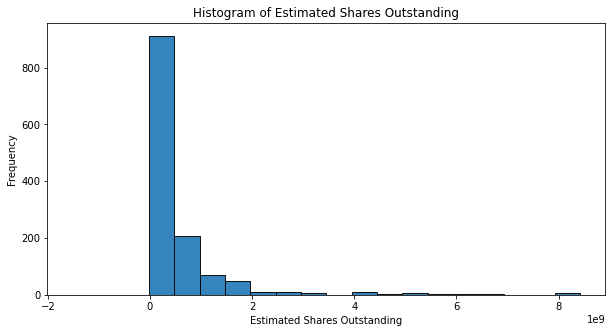

In [12]:
#histogram for the Estimated Shares Outstanding
plt.figure(figsize=(10,5))
plt.hist(stock_df['Estimated Shares Outstanding'], bins=20, edgecolor='black', alpha=0.9)
plt.title("Histogram of Estimated Shares Outstanding")
plt.xlabel("Estimated Shares Outstanding")
plt.ylabel("Frequency")
plt.show()

#### Interpretation: The histogram is not normal but has large values centered around zero, I would use right skewed to describe the distribution of the data

### Scatter Plot to Understand Relation Between Variables And Estimated Shares Outstanding

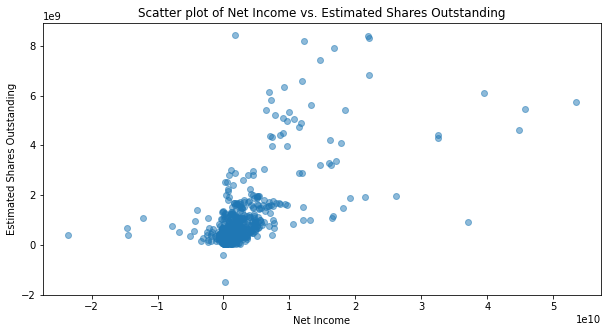

In [13]:
# scatter plot for net income vs. shares outstanding
plt.figure(figsize=(10, 5))
plt.scatter(stock_df['Net Income'], stock_df['Estimated Shares Outstanding'], alpha=0.5)
plt.title("Scatter plot of Net Income vs. Estimated Shares Outstanding")
plt.xlabel("Net Income")
plt.ylabel("Estimated Shares Outstanding")
plt.show()

#### Interpretation: Net Income and Estimated Shares Outstanding have a moderate correlation since the chart appears to be linear but most data is around zero. 

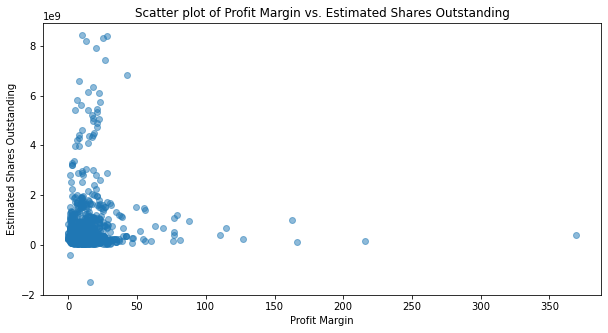

In [14]:
# scatter plot for profit margin vs. shares outstanding
plt.figure(figsize=(10, 5))
plt.scatter(stock_df['Profit Margin'], stock_df['Estimated Shares Outstanding'], alpha=0.5)
plt.title("Scatter plot of Profit Margin vs. Estimated Shares Outstanding")
plt.xlabel("Profit Margin")
plt.ylabel("Estimated Shares Outstanding")
plt.show()


#### Interpretation: Profit Margin and Estimated Shares Outstanding have a slight positive correlation as the graph grows upwards, as we collect more data with years this might show a clear linear relation.  

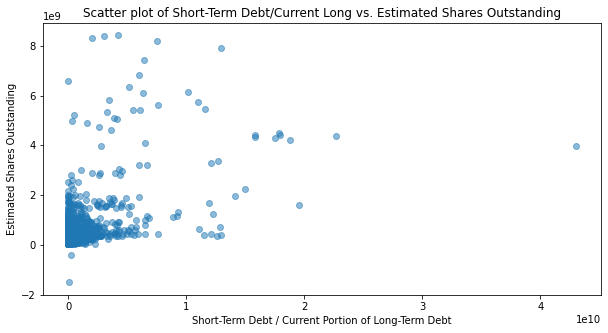

In [15]:
# scatter plot for st/lt debt vs. shares outstanding
plt.figure(figsize=(10, 5))
plt.scatter(stock_df['Short-Term Debt / Current Portion of Long-Term Debt'], stock_df['Estimated Shares Outstanding'], alpha=0.5)
plt.title("Scatter plot of Short-Term Debt/Current Long vs. Estimated Shares Outstanding")
plt.xlabel("Short-Term Debt / Current Portion of Long-Term Debt")
plt.ylabel("Estimated Shares Outstanding")
plt.show()


#### Interpretation: Short-Term Debt/Current Long and Estimated Shares Outstanding have a slight positive correlation but it is not very linear in relation.

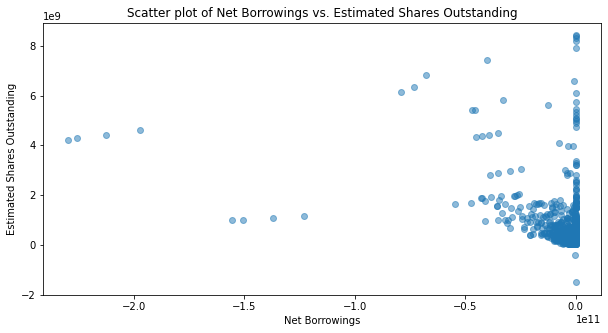

In [16]:
# scatter plot for treasury stock vs. shares outstanding
plt.figure(figsize=(10, 5))
plt.scatter(stock_df['Treasury Stock'], stock_df['Estimated Shares Outstanding'], alpha=0.5)
plt.title("Scatter plot of Net Borrowings vs. Estimated Shares Outstanding")
plt.xlabel("Net Borrowings")
plt.ylabel("Estimated Shares Outstanding")
plt.show()


#### Interpretation: Net Borrowings and Estimated Shares Outstanding have a mostly negative correlation since it is very close to zero, the graph is unclear since most datapoints are around zero but it is very clearly negative. 

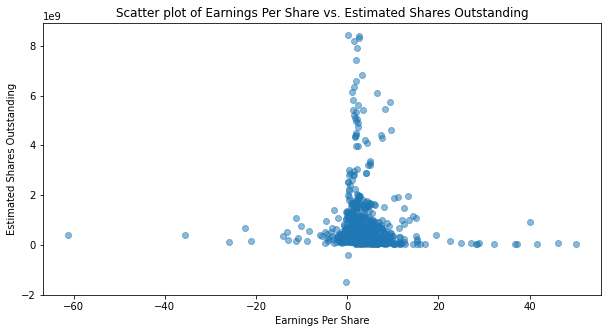

In [17]:
# scatter plot for earnings per share vs. shares outstanding
plt.figure(figsize=(10, 5))
plt.scatter(stock_df['Earnings Per Share'], stock_df['Estimated Shares Outstanding'], alpha=0.5)
plt.title("Scatter plot of Earnings Per Share vs. Estimated Shares Outstanding")
plt.xlabel("Earnings Per Share")
plt.ylabel("Estimated Shares Outstanding")
plt.show()


#### Interpretation: The correlation between Earnings Per Share and Estimated Shares Outstanding is hard to determine since the plot has no clear pattern and is centered around zero, one could say that there is no correlation at all. 

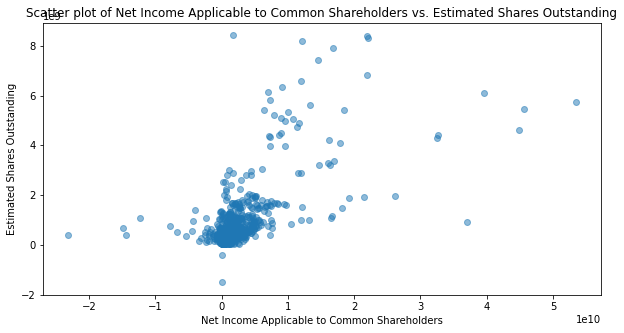

In [18]:
# scatter plot for net income applicable vs. shares outstanding
plt.figure(figsize=(10, 5))
plt.scatter(stock_df['Net Income Applicable to Common Shareholders'], stock_df['Estimated Shares Outstanding'], alpha=0.5)
plt.title("Scatter plot of Net Income Applicable to Common Shareholders vs. Estimated Shares Outstanding")
plt.xlabel("Net Income Applicable to Common Shareholders")
plt.ylabel("Estimated Shares Outstanding")
plt.show()


#### Interpretation: The correlation between Net Income Applicable to Common Shareholders and Estimated Shares Outstanding is moderately positive as they data shows small increases with increase in Shares.

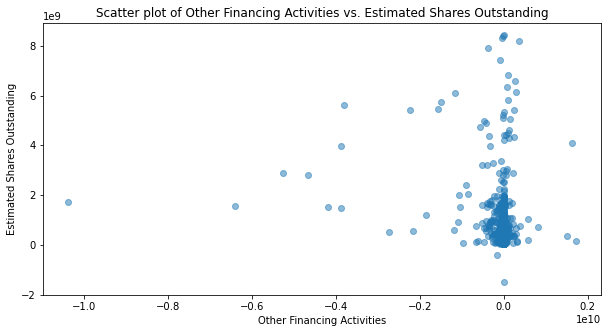

In [19]:
# scatter plot for other financing activities vs. shares outstanding
plt.figure(figsize=(10, 5))
plt.scatter(stock_df['Other Financing Activities'], stock_df['Estimated Shares Outstanding'], alpha=0.5)
plt.title("Scatter plot of Other Financing Activities vs. Estimated Shares Outstanding")
plt.xlabel("Other Financing Activities")
plt.ylabel("Estimated Shares Outstanding")
plt.show()


#### Interpretation: There is no correlation between Other Financing Activities and Estimated Shares Outstanding as the data in very centered around zero and has no identifying pattern.

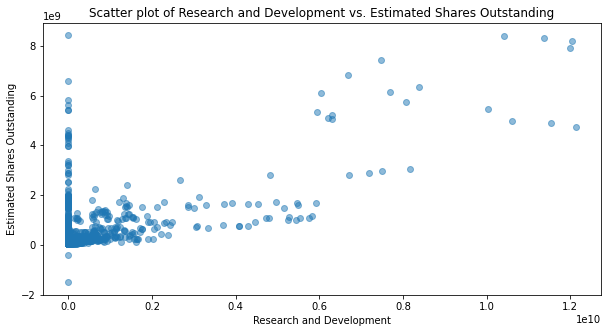

In [20]:
# scatter plot for R&D vs. shares outstanding
plt.figure(figsize=(10, 5))
plt.scatter(stock_df['Research and Development'], stock_df['Estimated Shares Outstanding'], alpha=0.5)
plt.title("Scatter plot of Research and Development vs. Estimated Shares Outstanding")
plt.xlabel("Research and Development")
plt.ylabel("Estimated Shares Outstanding")
plt.show()


#### Interpretation: The correlation between Research and Development and Estimated Shares Outstanding is postive as the datapoints are linearly growing with increase in Shares.

## 2. Linear Regression Model Development

**Explanation of the model**:
As I explored the dataset, I observed prevalent coorelation between most variables and the number of Estimated Shares Outstanding (y_variable), this can have direct and indirect impact on the y_variable. For instance, variables like Research and Development, Short-Term Debt / Current Portion of Long-Term Debt and others displayed above in the scatter plot all have meaningul relation with Shares, for example, as R & D enhances shares of the company increase and with increase in Net Income, shares will perform better. 

Hence, we use all the variables from the balance sheet to understand the relationship and their significance with Estimated Shares Outstanding (y_variable). We will further investigate by FDR with BH procedure to understand what significance level will capture the most useful variables that impact Shares. 

In [21]:
# naming the X variable 
x_var = stock_df.drop(['Estimated Shares Outstanding', 'Ticker Symbol', 'Period Ending'], axis=1)

# naming the y variable 
y_var = stock_df['Estimated Shares Outstanding']

#adding the constant (intercept)
X = sm.add_constant(x_var)
result = sm.OLS(y_var, X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Estimated Shares Outstanding   R-squared:                       0.854
Model:                                      OLS   Adj. R-squared:                  0.846
Method:                           Least Squares   F-statistic:                     98.40
Date:                          Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                                  00:01:28   Log-Likelihood:                -27507.
No. Observations:                          1299   AIC:                         5.516e+04
Df Residuals:                              1225   BIC:                         5.554e+04
Df Model:                                    73                                         
Covariance Type:                      nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                7.312e+08      1e+09      0.729      0.466   -1.24e+09     2.7e+09
Accounts Payable                                     -183.9454    238.959     -0.770      0.442    -652.760     284.869
Accounts Receivable                                    -0.0722      0.057     -1.274      0.203      -0.183       0.039
Add'l income/expense items                              0.0361      0.057      0.635      0.525      -0.075       0.148
After Tax ROE                                       -6.663e+05      5e+05     -1.332      0.183   -1.65e+06    3.15e+05
Capital Expenditures                                    0.9122      2.396      0.381      0.704      -3.789       5.614
Capital Surplus                                         0.0149      0.009      1.631      0.103      -0.003       0.033
Cash Ratio                                           6.866e+05   3.83e+05      1.793      0.073   -6.45e+04    1.44e+06
Cash and Cash Equivalents                              -1.2388      0.617     -2.008      0.045      -2.449      -0.029
Changes in Inventories                                 -0.0876      0.060     -1.456      0.146      -0.206       0.030
Common Stocks                                          -0.0014      0.010     -0.143      0.886      -0.020       0.018
Cost of Revenue                                      3655.6251   5011.630      0.729      0.466   -6176.705    1.35e+04
Current Ratio                                       -2.044e+05   2.94e+05     -0.695      0.487   -7.82e+05    3.73e+05
Deferred Asset Charges                                 -0.0585      0.989     -0.059      0.953      -1.999       1.882
Deferred Liability Charges                              0.0094      0.099      0.095      0.925      -0.185       0.204
Depreciation                                           -0.0843      0.057     -1.488      0.137      -0.196       0.027
Earnings Before Interest and Tax                       22.5389     39.533      0.570      0.569     -55.022     100.100
Earnings Before Tax                                   -22.8602     39.533     -0.578      0.563    -100.420      54.699
Effect of Exchange Rate                                -0.0233      0.166     -0.141      0.888      -0.348       0.302
Equity Earnings/Loss Unconsolidated Subsidiary          0.1119      0.082      1.371      0.171      -0.048       0.272
Fixed Assets                                           -0.0572      0.989     -0.058      0.954      -1.998       1.883
Goodwill                                               -0.0642      0.989     -0.065      0.9

## 3. Multicollinearity in Linear Regression

The model above gives us notes "The condition number is large, 1.17e+16. This might indicate that there are strong multicollinearity or other numerical problems." Hence it is warning to report that their is multicollinearlity. Multicollinearity can impact the interpretations of the coefficients in a linear regression model by intertwining the effects of the variables that would have collinearity. 

When X variables that have collinearity, they move together and impact y variable collectively. This makes it very challenging to interpret the individual effects of variables hence introducing bias into the coefficients. Moreover, multicollinearlity can result into statistically insignificance of variables which results in irrevalent predicting and explaining the y variable.

## 4. P-Value Analysis and Histogram

In [22]:
p_values = result.pvalues
p_values

const                         4.658595e-01
Accounts Payable              4.415806e-01
Accounts Receivable           2.029366e-01
Add'l income/expense items    5.253299e-01
After Tax ROE                 1.831375e-01
                                  ...     
Total Liabilities & Equity    4.663206e-01
Total Revenue                 4.658790e-01
Treasury Stock                4.199306e-01
For Year                      6.311003e-01
Earnings Per Share            7.831145e-27
Length: 76, dtype: float64

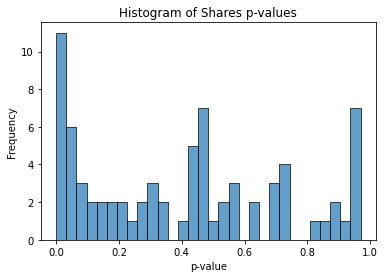

In [23]:
plt.hist(p_values, bins=30, edgecolor='black', alpha=0.7) # set the histogram
# set value, x, y labels
plt.title("Histogram of Shares p-values")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.show() # this will print the histogram

#### Interpretation: There is clear right skewness, we have way most p-values close to an 0 than most values. Therefore, there is a spike of p-values close to 0. Under the null hypothesis, p-values are uniformly distributed. However, the spike shown in the histogram above is an evidence that there are some true signals indicated by our model.

## 5. False Discovery Rate Control with BH Procedure

In [24]:
# define the function for BH procedure
def fdr(pvals, q, plotit=False):
  # Remove NA values
  pvals = np.array(pvals)
  pvals = pvals[~np.isnan(pvals)]
  N = len(pvals)

  # Sort the p-values and calculate the FDR threshold
  sorted_pvals = np.sort(pvals)
  k = np.arange(1, N+1)
  fdr_threshold = (q * k) / N

  # Find the last p-value that is below the FDR threshold
  below_threshold = sorted_pvals <= fdr_threshold
  max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
  alpha = sorted_pvals[max_index]

  # Count number of p-values below threshold
  true_discoveries = sum(below_threshold)
  print(f"Alpha: {alpha}")
  print(f"Number of true discoveries: {true_discoveries}")

  # Optional plot
  if plotit:
    plt.scatter(range(N), sorted_pvals, c=np.where(sorted_pvals <= alpha, 'red', 'grey'), marker='o')
    plt.yscale('log')
    plt.plot(range(N), fdr_threshold, linestyle='--', color='blue')
    plt.xlabel("Tests ordered by p-value")
    plt.ylabel("p-values")
    plt.title(f"FDR = {q}")
    plt.show()

  return alpha, true_discoveries

Alpha: 0.0016866309336669102
Number of true discoveries: 7


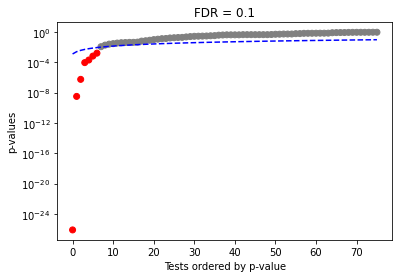

In [25]:
# when q = 0.1
alpha_threshold = fdr(p_values, 0.1, plotit=True)

#### Interpretation: At q= 0.1, **We estimate that there are 7 "true" discoveries.** which is 7 variables out of 73 predictors

## 6. Sensitivity Analysis of FDR Control

In [26]:
# create a list of q values
q_values = np.array([0.01,0.05,0.1,0.15,0.2,0.25])

# create a list comprehension to test different q values
sens_result = [fdr(p_values, x, plotit=False) for x in q_values]

Alpha: 0.0006898272285037104
Number of true discoveries: 6
Alpha: 0.0016866309336669102
Number of true discoveries: 7
Alpha: 0.0016866309336669102
Number of true discoveries: 7
Alpha: 0.012009465933712398
Number of true discoveries: 8
Alpha: 0.026230279132497526
Number of true discoveries: 10
Alpha: 0.04826867943437572
Number of true discoveries: 17


In [27]:
# conver the result to a dataframe
sens_result = pd.DataFrame(sens_result)
sens_result.columns = ['Alpha','true_discover']
sens_result.index = q_values
sens_result

,Alpha,true_discover
0.01,0.000690,6
0.05,0.001687,7
0.10,0.001687,7
0.15,0.012009,8
0.20,0.026230,10
0.25,0.048269,17



#### Interpretation: The count of true discoveries remains relatively same as q increases. From q = 0.01 to 0.05, true discoveries remain unchanged. At q= 0.15, there is an increase of 1 true discovery and at q= 0.2, we see the number goes up by 2. This increases with q going up significantly. 
**This tell us that the significant variables of the model is robust and relatively stable as long as we do not increase q beyond 0.2.**

## 7. Exploring Interaction Terms

a. Expand your linear regression model by adding interaction terms. Create interaction terms between pairs of predictors (up to quadratic terms, i.e., terms of power two). You should include both original predictors and their interaction terms in your model

b. Briefly explain why interaction terms might be important in the context of predicting Estimated Shares Outstanding using fundamental financial metrics.

In [28]:
from sklearn.preprocessing import PolynomialFeatures
dummy_df = stock_df.iloc[:, 2:27]

poly = PolynomialFeatures(degree=2, include_bias=True)
transformed_data = poly.fit_transform(dummy_df)
new_columns = poly.get_feature_names_out(dummy_df.columns)
transformed_df = pd.DataFrame(transformed_data, columns=new_columns)
estShare_df = stock_df['Estimated Shares Outstanding']

## This dataframe contains the 25 variables of interest
## Alongwith interactions
## 25 for original variables + 300 combinations + 25 for squared original variables

In [29]:
#reset indices
estShare_df = estShare_df.reset_index(drop=True)
transformed_df = transformed_df.reset_index(drop=True)

# Ensure they are of the same length
if len(estShare_df) == len(transformed_df):
    combined_df = pd.concat([estShare_df, transformed_df], axis=1) # Combine both df to a single one, we will use the combined df in ols modeling
else:
    raise ValueError("Length of estShare_df and transformed_df is not the same")


In [30]:
modelInt = sm.OLS(combined_df.iloc[:, 0], combined_df.iloc[:, 1:])

resultInt_df = modelInt.fit()

resultInt_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Estimated Shares Outstanding   R-squared:                       0.944
Model:                                      OLS   Adj. R-squared:                  0.926
Method:                           Least Squares   F-statistic:                     52.59
Date:                          Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                                  00:01:30   Log-Likelihood:                -26886.
No. Observations:                          1299   AIC:                         5.440e+04
Df Residuals:                               983   BIC:                         5.604e+04
Df Model:                                   315                                         
Covariance Type:                      nonrobust                                         
===================================================================================================================================================
                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------
1                                                                                   0.0003      0.000      1.478      0.140      -0.000       0.001
Accounts Payable                                                                   -0.0741      0.046     -1.611      0.107      -0.164       0.016
Accounts Receivable                                                                -0.5071      0.286     -1.774      0.076      -1.068       0.054
Add'l income/expense items                                                          0.0749      0.270      0.277      0.782      -0.456       0.606
After Tax ROE                                                                       0.0010      0.001      1.465      0.143      -0.000       0.002
Capital Expenditures                                                                0.0211      0.097      0.219      0.827      -0.168       0.211
Capital Surplus                                                                     0.0557      0.021      2.655      0.008       0.015       0.097
Cash Ratio                                                                          0.0003      0.000      1.142      0.254      -0.000       0.001
Cash and Cash Equivalents                                                          -0.0251      0.059     -0.425      0.671      -0.141       0.091
Changes in Inventories                                                             -0.1772      0.496     -0.357      0.721      -1.150       0.796
Common Stocks                                                                      -0.0120      0.049     -0.243      0.808      -0.109       0.085
Cost of Revenue                                                                    -0.0082      0.009     -0.896      0.370      -0.026       0.010
Current Ratio                                                                    1.321e-05   9.37e-05      0.141      0.888      -0.000       0.000
Deferred Asset Charges                                                              0.2456      0.121      2.025      0.043       0.008       0.484
Deferred Liability Charges                                                         -0.0336      0.059     -0.570      0.569      -0.149       0.082
Depreciation                                                                        0.0544      0.152      0.359      0.720      -0.243       0.352
Earnings Before Interest and Tax                                                    0.3941      0.290      1.359      0.174      -0.175       0.963
Earnings Befo

In [31]:
n = len(resultInt_df.params)
print(n)
#Verify we did the computations on correct number of interactions.
# 350 + 1 (intercept column)

351


##### Interpretation: With addition of Interaction in the regression model and increase in variables from 25 to 325, we are seeing significant higher adjusted R-squared and higher multicollinearity. This regression model might serve us the purpose of enhanced prediction but we are not sure if all these variables are significantly contribution. After the FDR, we will be able to configure true discoveries for the model.

## 8. Model Evaluation with Interaction Terms


c. Evaluate the performance of this new model with interaction terms. Compare it with the performance of the original model without interaction terms using appropriate metrics.

d. Discuss any significant changes in the model's performance or the coefficients of the predictors


### Part C Answer: 

As per my knowledge, there are a few indicators that help judge the performance of a model and aid in comparison with other models. I will use those metrics to distinguish performance in the two other. I will start with: 

1. F-statistic :
Original Model: 98.40 (statistically significant)
New Model with Interaction: 48.33 (still statistically significant but lower)
While the stats is low, it is a trade-off between model complexity and significance. The new model has higher complexity with 315 predictors. 

2. Adjusted R-squared: 
Original Model: 84.6%
New Model with Interaction: 92.2%
The new model clearly has higher R-square hence it indicantes an overall improvement with switching models. 

3. Model Complexity:
The original model has 73 predictors, whereas the new model has 315 predictors this is a clear indication that the rise in predictors means more complex model. 

4. AIC and BIC: 
The new model with interactions has lower AIC indicating a better and improved fit of the model. Though BIC is increased for the new model due to increase in complexity.

Thus, these metrics helps us to come to a conclusion that new model with interaction might be a better choice overall. 

### Part D Answer: 

The model with interaction shows much better adjusted R-squared but it shows complexity. All the metrics above indicate the new model is better even the F-stat is lower which is due to complex nature of the model. Interpreting the effect of a each coefficient is a little tricky given there is still higher multicollinearity. These factors are important to weigh in to ensure we select the best variables for the model.  

## 9. FDR Analysis with Interaction Terms

a. Create a histogram of the p-values for the new model including interaction terms. Discuss any noticeable differences from the histogram you created for the original model.

b. Apply the Benjamini-Hochberg (BH) procedure to control the False Discovery Rate
(FDR) with a q-value of 0.1. How many significant predictors are identified now,
including both main effects and interaction effects?

c. Compare these results with those obtained from the original model. Discuss the impact
of including interaction terms on the number of discoveries and the control of the FDR.


In [32]:
p_valuesInt_df = resultInt_df.pvalues
p_valuesInt_df

1                                 0.139816
Accounts Payable                  0.107403
Accounts Receivable               0.076335
Add'l income/expense items        0.781838
After Tax ROE                     0.143283
                                    ...   
Gross Profit Income Tax           0.250742
Gross Profit Intangible Assets    0.401855
Income Tax^2                      0.694795
Income Tax Intangible Assets      0.024503
Intangible Assets^2               0.003371
Length: 351, dtype: float64

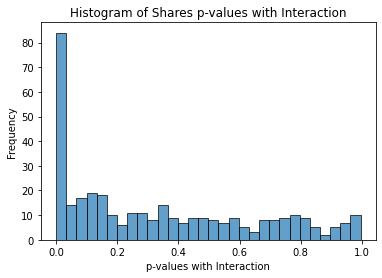

In [33]:
plt.hist(p_valuesInt_df, bins=30, edgecolor='black', alpha=0.7) # set the histrogram
# set value, x, y labels
plt.title("Histogram of Shares p-values with Interaction")
plt.xlabel("p-values with Interaction")
plt.ylabel("Frequency")
plt.show() # this will print the histogram

#### Interpretation: The histogram with p-values of the new model with interactions has a very tall spike near the zero on the X-axis. The other p-values are spread more uniformaly than the original model. There were some gaps present in the original histogram in contrast with the new histogram, there are barely any gaps. 

Alpha: 0.01918077402021873
Number of true discoveries: 75


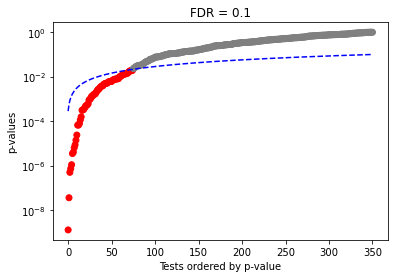

In [34]:
# when q = 0.1
alpha_threshold = fdr(p_valuesInt_df, 0.1, plotit=True)

#### At q= 0.1, 23 have **74 significant predictors are identified now, including main and interaction effects.** in the new model.

#### To conclude with 9C, The new model incorporates higher count of new discoveries (74 from 7). This shows that interaction terms can capture important interactions between variables. To ensure fair comparison, we had the same q=0.1, this control validates increase in true discoveries is a result of significance effects hence avoiding false positives. 